### Plot more kernel shapes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

from disp import set_plot, colors
from kernels import make_psi_rand_lin
from kernels import make_psi_rand_sgm
from kernels import make_psi_rand_k_wta
from kernels import make_psi_rand_tanh_k_wta
from kernels import make_psi_rand_th_wta
from kernels import make_psi_rand_softmax
from kernels import make_psi_rand_tanh_softmax

In [2]:
D = 2
RX = np.linspace(-2, 2, 41)
X_STARS = np.array([
    # main text
    [np.cos(9*np.pi/16), np.sin(9*np.pi/16)],
    # supp
    [np.cos(np.pi/4), np.sin(np.pi/4)],
    [-1, 0],
    [1.5*np.cos(-np.pi/6), 1.5*np.sin(-np.pi/6)],
    [.8*np.cos(-np.pi/6), .8*np.sin(-np.pi/6)],
    ])

def make_ker_mats(ker):
    k_mats = []

    for x_star in X_STARS:
        k_mat = np.nan*np.eye(len(RX))
        for cx_0 in range(len(RX)):
            for cx_1 in range(len(RX)):
                x_test = np.array([RX[cx_0], RX[cx_1]])
                k_mat[cx_0, cx_1] = ker(x_star, x_test)

        k_mats.append(k_mat)
        
    return k_mats

$k(\mathbf{x}^*, \mathbf{x}) = \boldsymbol{\psi}(\mathbf{x}^*)^T\boldsymbol{\psi}(\mathbf{x})$

## RAND-LIN

$\boldsymbol{\psi}(\mathbf{x}) = J_{\psi}\mathbf{x}/\sqrt{N}$

$(J_{\psi})_{ij} \sim \mathcal{N}(0, g^2)$

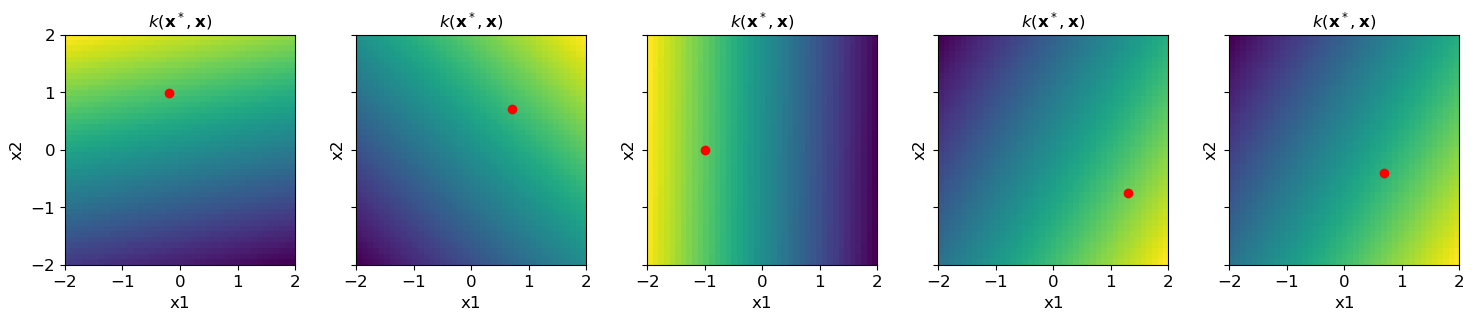

In [3]:
N = 2000
G = 1
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_lin(J_PSI)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')

# fig.savefig(f'ms/s1_ker_rand_proj_lin_{G}.svg')

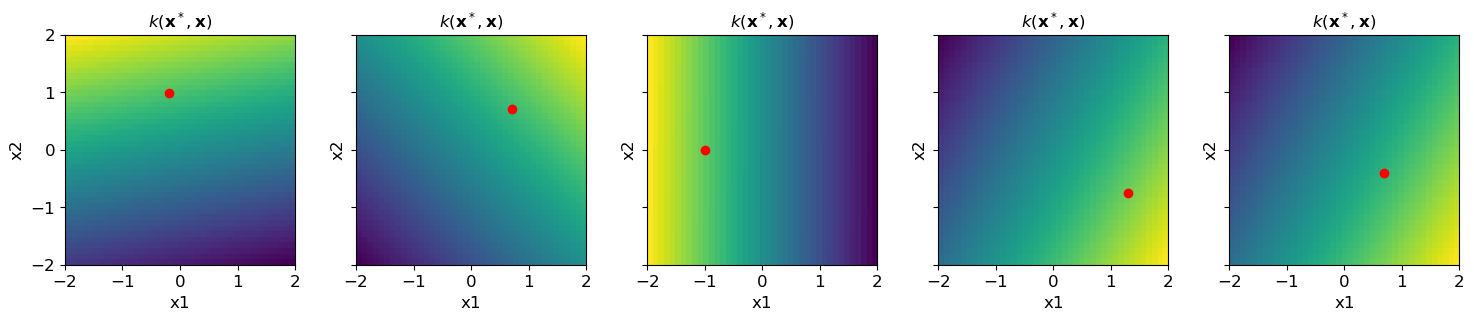

In [4]:
N = 2000
G = 10
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_lin(J_PSI)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')

# fig.savefig(f'ms/s1_ker_rand_proj_lin_{G}.svg')

## RAND-PROJ-SIGMOID

$\boldsymbol{\psi}(\mathbf{x}) = \left(1+\tanh(J_{\psi}\mathbf{x})\right)/2\sqrt{N}$

$(J_{\psi})_{ij} \sim \mathcal{N}(0, g^2)$

0.7265350207082671
0.7377925873970804
0.770667180378853
0.791112061768386
0.7149879154738393


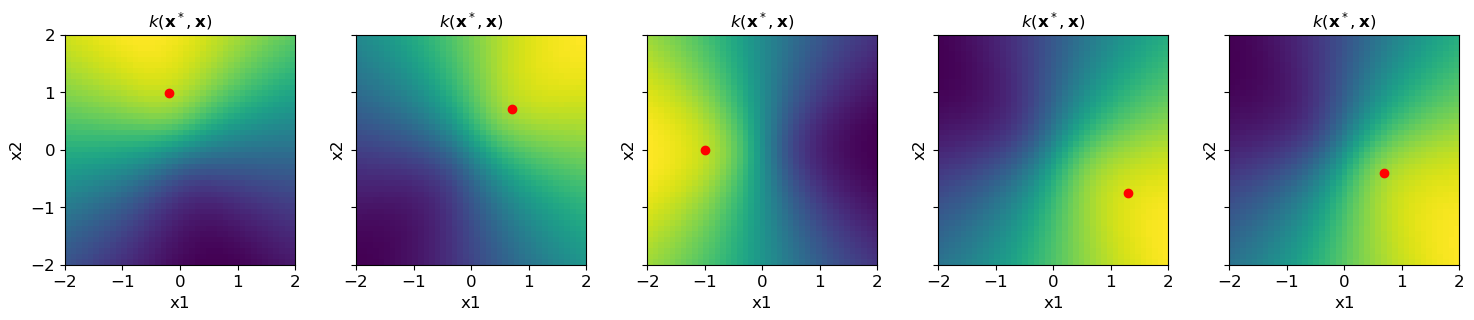

In [5]:
N = 2000
G = 1
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_sgm(J_PSI)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    print(k_mat.max())
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s1_ker_rand_proj_sigmoid_g_{G}.svg')

1.0182182306980339
0.963772358329355
1.017284605810879
0.985337399880757
0.9813009571048208


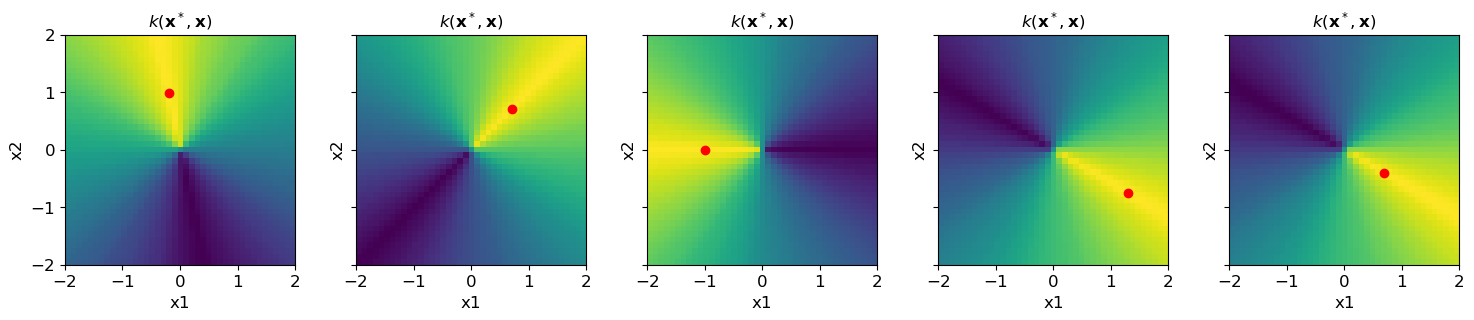

In [6]:
N = 2000
G = 50
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_sgm(J_PSI)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    print(k_mat.max())
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s1_ker_rand_proj_sigmoid_g_{G}.svg')

## RAND-PROJ-TANH-KWTA

$\boldsymbol{\psi}(\mathbf{x}) = \text{K-WTA}(\tanh(J_{\psi}\mathbf{x}))/\sqrt{K}$

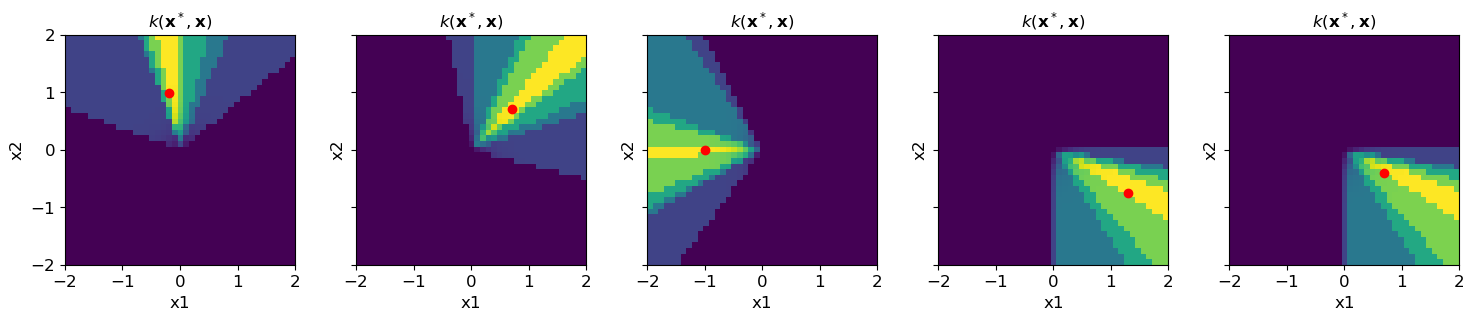

In [7]:
N = 2000
G = 1
K = 5
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_tanh_k_wta(J_PSI, K)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s1_psi_rand_proj_tanh_kwta_g_{G}_k_{K}.svg')

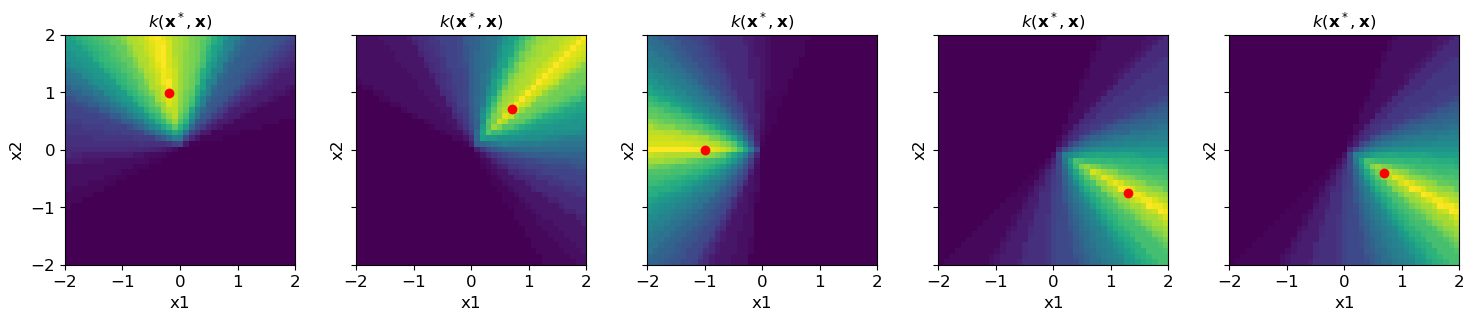

In [8]:
N = 2000
G = 1
K = 50
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_tanh_k_wta(J_PSI, K)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s1_psi_rand_proj_tanh_kwta_g_{G}_k_{K}.svg')

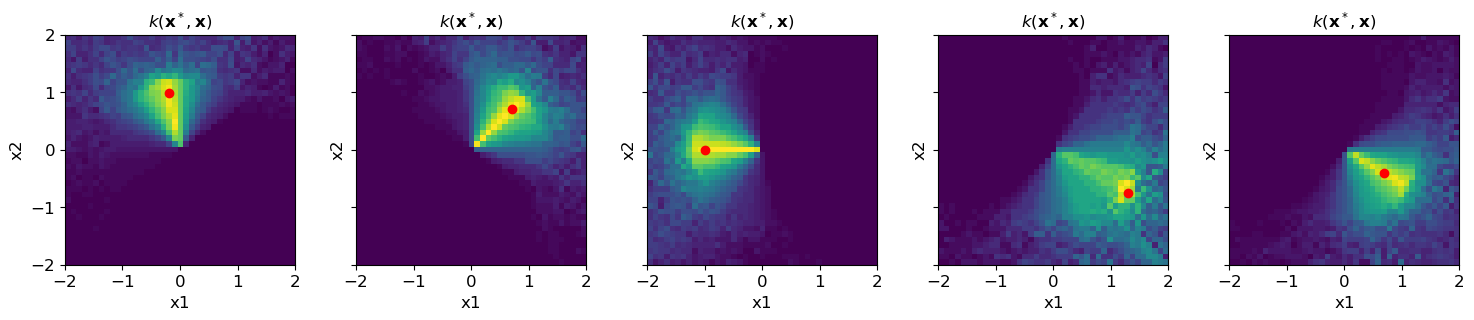

In [9]:
N = 2000
G = 8
K = 50
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_tanh_k_wta(J_PSI, K)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s1_psi_rand_proj_tanh_kwta_g_{G}_k_{K}.svg')

# Supplement

## RAND-PROJ-KWTA

$\boldsymbol{\psi}(\mathbf{x}) = \text{K-WTA}(J_{\psi}\mathbf{x}/\sqrt{N})/\sqrt{K}$

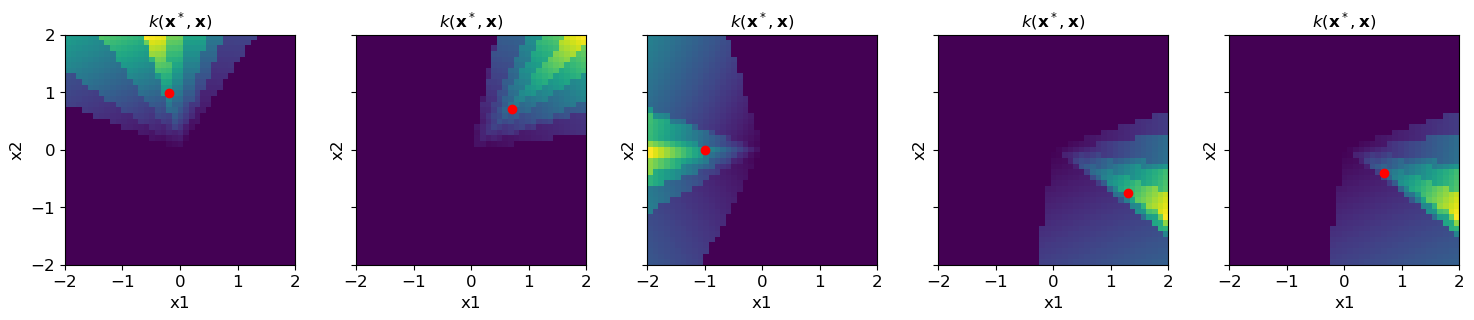

In [10]:
N = 2000
G = 1
K = 5
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_k_wta(J_PSI, K)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_kwta_g_{G}_k_{K}.svg')

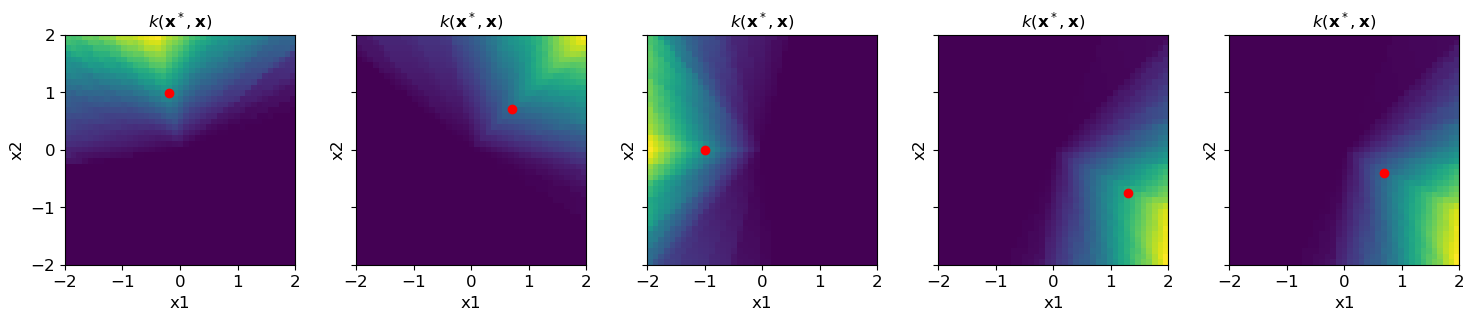

In [11]:
N = 2000
G = 1
K = 50
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_k_wta(J_PSI, K)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_kwta_g_{G}_k_{K}.svg')

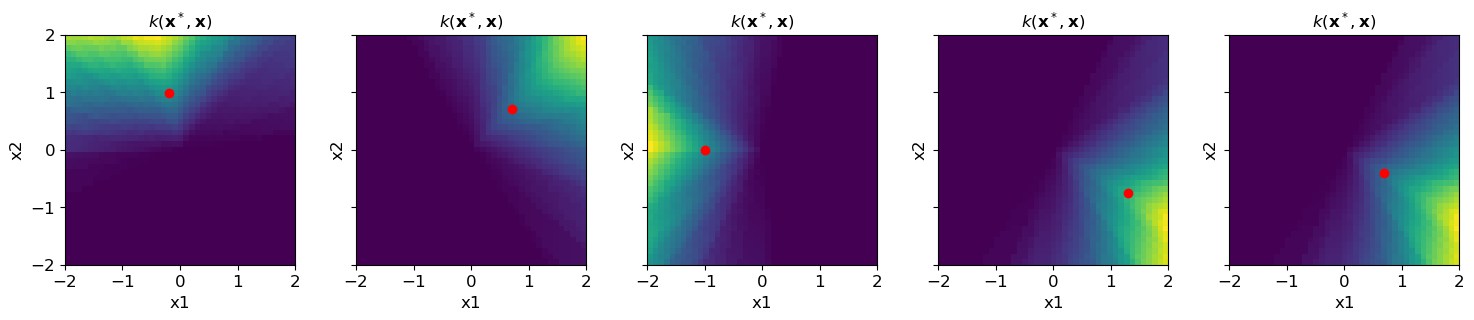

In [12]:
N = 2000
G = 8
K = 50
J_PSI = G*np.random.randn(N, D)

psi, ker = make_psi_rand_k_wta(J_PSI, K)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_kwta_g_{G}_k_{K}.svg')

## RAND-PROJ-TANH-SoftMax

$\boldsymbol{\psi}(\mathbf{x}) = \text{SoftMax}(\beta\tanh(J_{\psi}\mathbf{x}))$

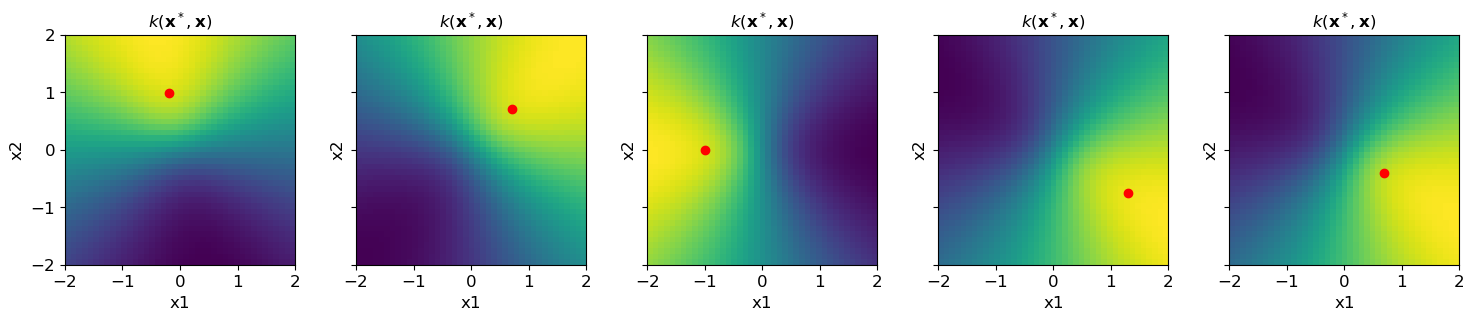

In [13]:
N = 2000
G = 1
J_PSI = G*np.random.randn(N, D)
BETA = 1

psi, ker = make_psi_rand_tanh_softmax(J_PSI, BETA)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_tanh_softmax_g_{G}_beta_{BETA}.svg')

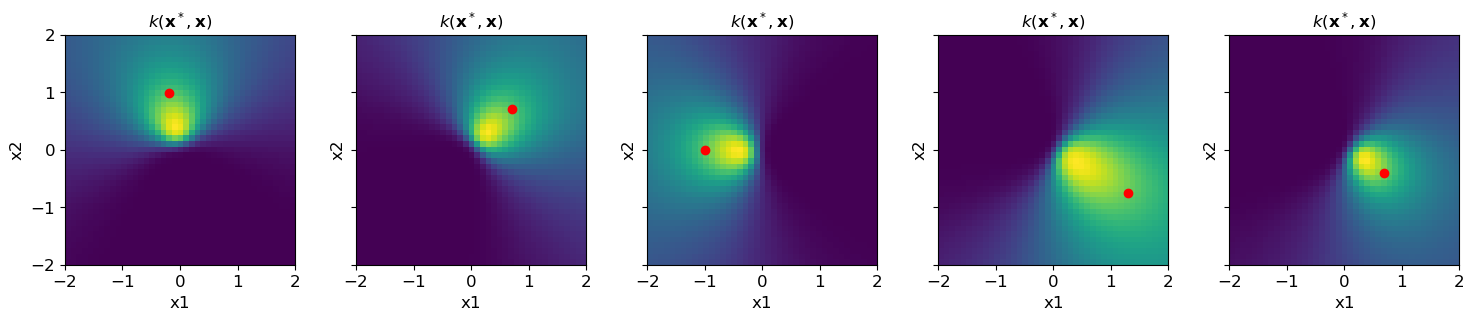

In [14]:
N = 2000
G = 1
J_PSI = G*np.random.randn(N, D)
BETA = 10

psi, ker = make_psi_rand_tanh_softmax(J_PSI, BETA)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_tanh_softmax_g_{G}_beta_{BETA}.svg')

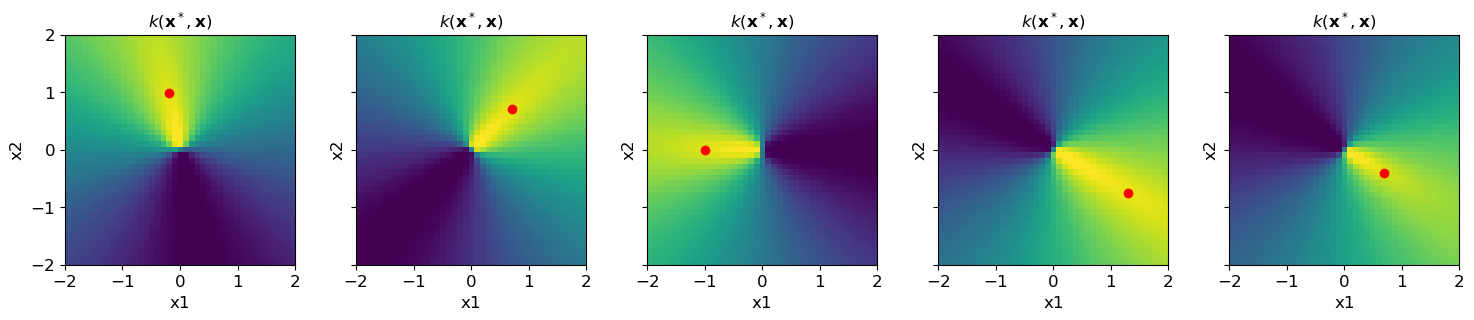

In [15]:
N = 2000
G = 8
J_PSI = G*np.random.randn(N, D)
BETA = 10

psi, ker = make_psi_rand_tanh_softmax(J_PSI, BETA)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_tanh_softmax_g_{G}_beta_{BETA}.svg')

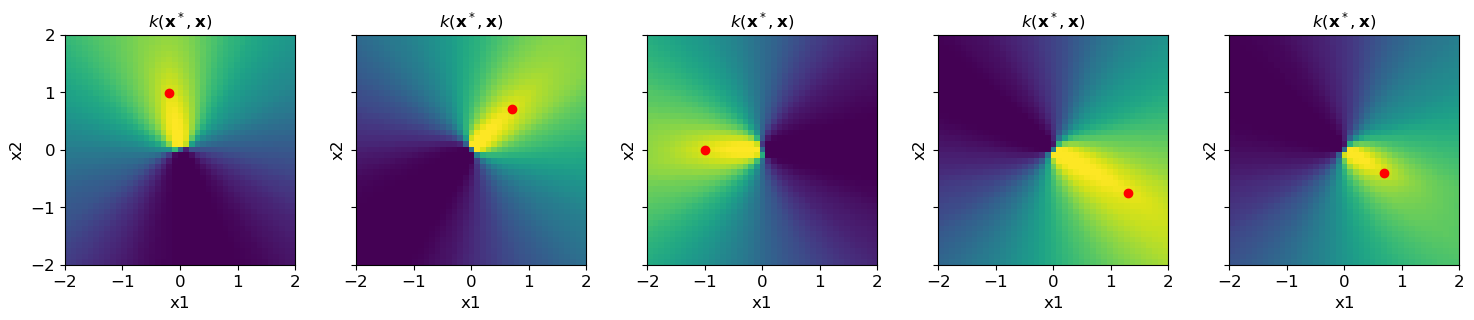

In [16]:
N = 2000
G = 8
J_PSI = G*np.random.randn(N, D)
BETA = 100

psi, ker = make_psi_rand_tanh_softmax(J_PSI, BETA)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_tanh_softmax_g_{G}_beta_{BETA}.svg')

## RAND-PROJ-SoftMax

$\boldsymbol{\psi}(\mathbf{x}) = \text{SoftMax}(\beta J_{\psi}\mathbf{x}/\sqrt{N})$

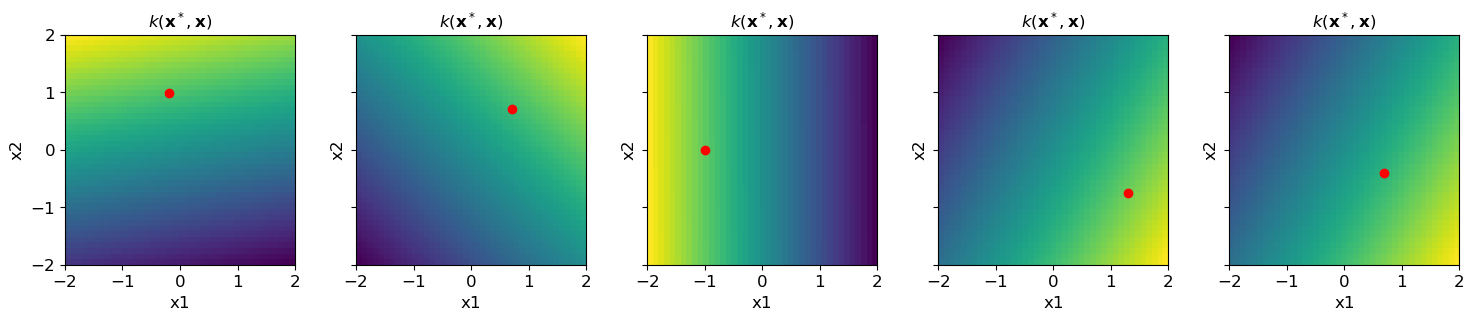

In [17]:
N = 2000
G = 1
J_PSI = G*np.random.randn(N, D)
BETA = 1

psi, ker = make_psi_rand_softmax(J_PSI, BETA)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_softmax_g_{G}_beta_{BETA}.svg')

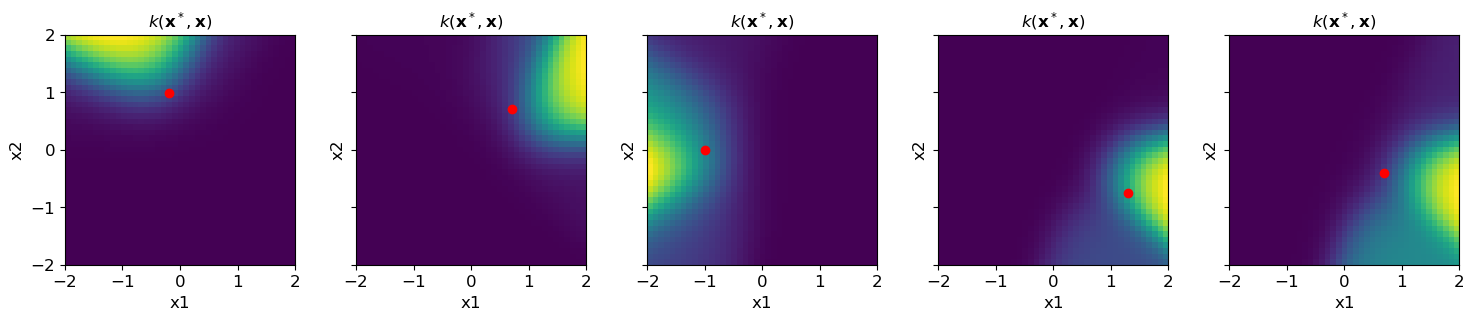

In [18]:
N = 2000
G = 1
J_PSI = G*np.random.randn(N, D)
BETA = 100

psi, ker = make_psi_rand_softmax(J_PSI, BETA)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_softmax_g_{G}_beta_{BETA}.svg')

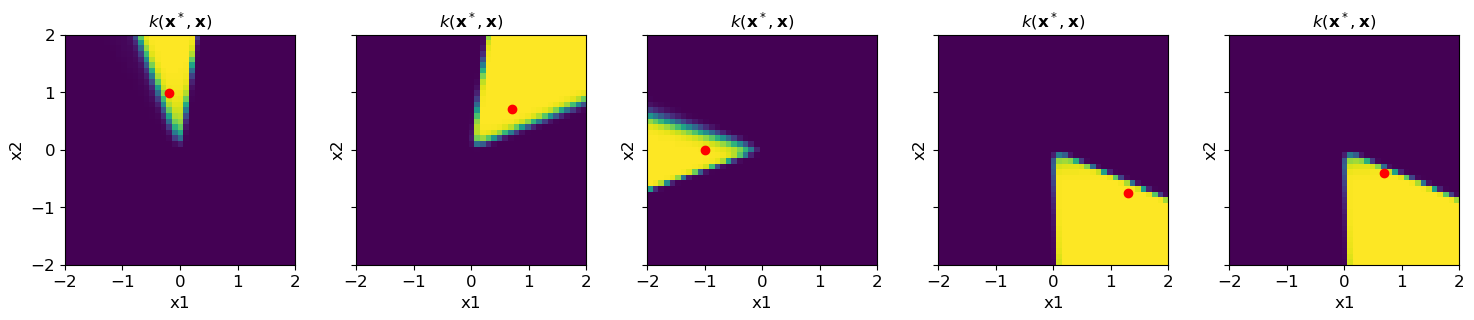

In [19]:
N = 2000
G = 1
J_PSI = G*np.random.randn(N, D)
BETA = 1000

psi, ker = make_psi_rand_softmax(J_PSI, BETA)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/s2_psi_rand_proj_softmax_g_{G}_beta_{BETA}.svg')

## RAND-TH-WTA

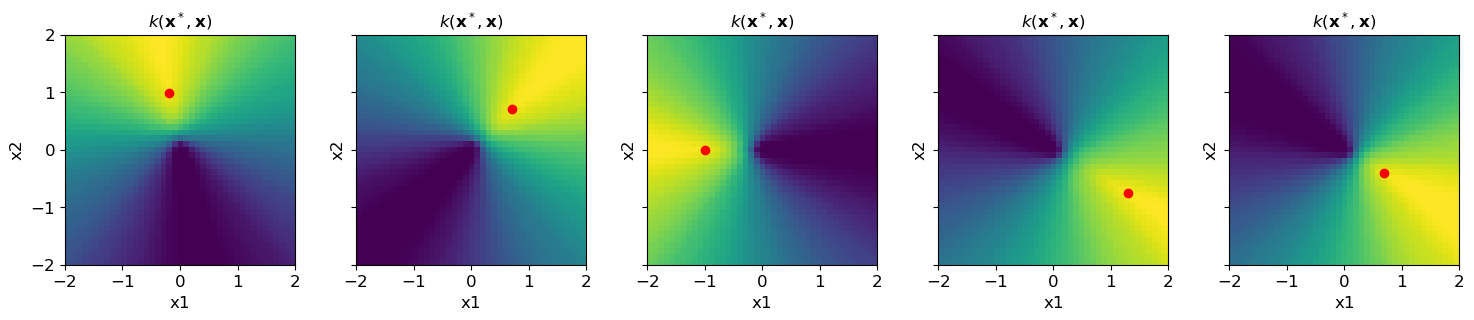

In [20]:
N = 2000
J_PSI = 5*np.random.randn(N, D)
TH = 1

psi, ker = make_psi_rand_th_wta(J_PSI, TH)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/2_ker_rand_th_wta_th_{TH}.svg')

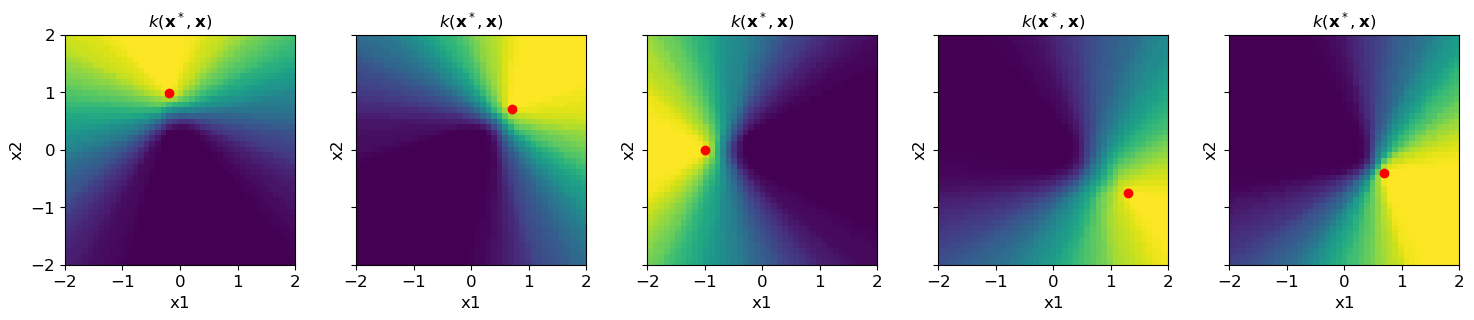

In [21]:
N = 2000
J_PSI = 5*np.random.randn(N, D)
TH = 5

psi, ker = make_psi_rand_th_wta(J_PSI, TH)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig(f'ms/2_ker_rand_th_wta_th_{TH}.svg')

## RAND-PROJ-TANH-MULTI

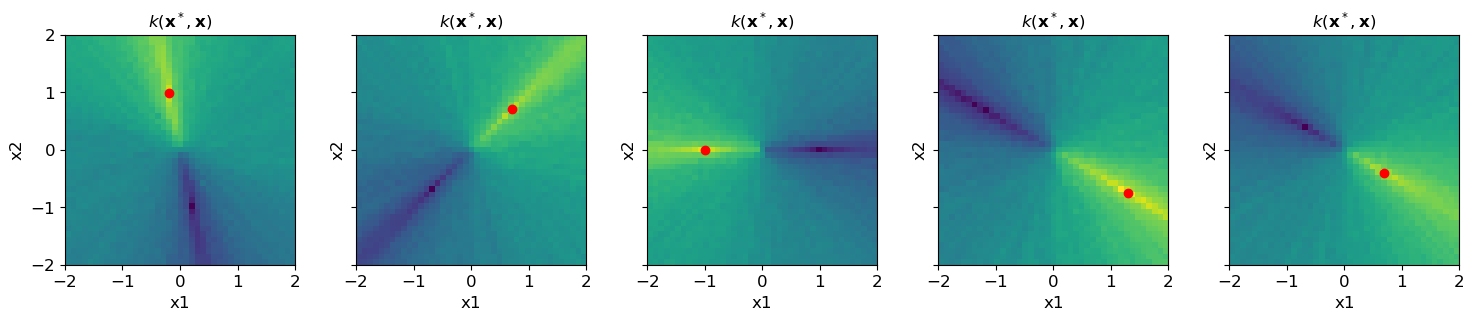

In [22]:
N = 2000
J_PSI = 5*np.random.randn(N, D)
J_PSI_2 = np.random.randn(N, N)

def make_psi_rand_tanh_multi(J_PSI, J_PSI_2):
                  
    def psi(x):
        temp_1 = np.tanh(J_PSI@x)
        temp_2 = np.tanh(J_PSI_2@temp_1)
        temp_3 = np.tanh(J_PSI_2@temp_2)
        return (np.tanh(J_PSI_2@temp_3)+1)/2
    
    def ker(x_1, x_2):
        return psi(x_1)@psi(x_2)
                  
    return psi, ker
    
psi, ker = make_psi_rand_tanh_multi(J_PSI, J_PSI_2)

k_mats = make_ker_mats(ker)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True, sharex=True, sharey=True)
for k_mat, x_star, ax in zip(k_mats, X_STARS, axs):
    ax.matshow(k_mat.T, origin='lower', extent=[RX[0], RX[-1], RX[0], RX[-1]])
    ax.scatter(*x_star, c='r')
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='x1', y_label='x2', title=r'$k(\mathbf{x}^*, \mathbf{x})$')
    
# fig.savefig('ms/s1_psi_rand_proj_tanh_multi.svg')